In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
zomato = pd.read_excel("C:\\Users\\RAHUL\\Desktop\\DataSets\\zomato.xlsx")

In [3]:
zomato.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [4]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

In [8]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [9]:
zomato.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
rates                          object
dtype: object

In [10]:
zomato = zomato.drop(['url','phone','dish_liked','menu_item'],axis=1)

In [11]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

In [9]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].astype(str)
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].apply(lambda x:x.replace(',','.'))
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].astype(float)

In [12]:
zomato['approx_cost(for two people)'].dtypes

dtype('float64')

In [13]:
zomato['rate'] = zomato['rates'].astype(str)
zomato['rate'] = zomato['rate'].apply(lambda x:x.replace('-',str(np.nan)))
zomato['rate'] = zomato['rate'].astype(float)
zomato.drop(['rates'],axis=1,inplace=True)

In [14]:
zomato['rate'].dtypes

dtype('float64')

In [15]:
zomato.dtypes

address                         object
name                            object
online_order                    object
book_table                      object
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
listed_in(type)                 object
listed_in(city)                 object
rate                           float64
dtype: object

In [16]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost(for two people)', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato
zomato = Encode(zomato.copy())

In [17]:
zomato['rate'] = zomato['rate'].fillna(zomato['rate'].mean())
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].fillna(zomato['approx_cost(for two people)'].mean())

In [18]:
zomato.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
rate                           0
dtype: int64

In [19]:
zomato.dropna(subset=['location','rest_type','cuisines'],inplace = True)

In [20]:
zomato.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
rate                           0
dtype: int64

In [57]:
 zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)', 'rate'],
      dtype='object')

In [21]:
zomato.head()

,address,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),rate
0,0,0,0,0,13,0,0,0,350.0,0,0,0,3.1
1,1,1,1,1,5015,1,1,1,1.8,1,1,1,4.6
2,2,2,1,0,6,2,0,2,250.0,2,1,2,3.4
3,3,3,1,0,699,3,2,3,1.5,3,1,0,4.3
4,4,4,0,0,129,4,3,4,150.0,4,0,1,3.7


In [22]:
 corr = zomato.corr(method='kendall')

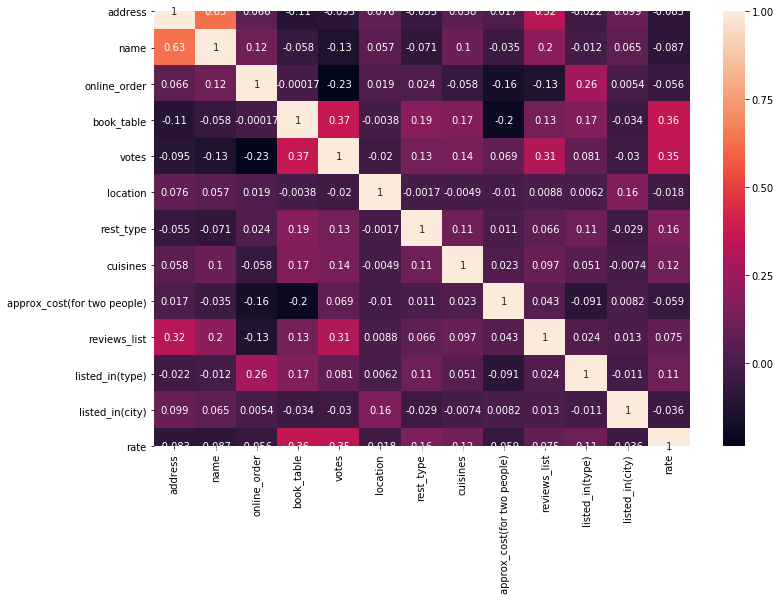

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [26]:
x = zomato.iloc[:,[2,3,4,5,6,7,8,9]]
y = zomato['rate']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state = 353)

In [28]:
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list
36759,1,0,24,9,20,2067,1.9,8674
1067,1,0,28,44,2,458,550.0,882
36252,0,0,41,18,8,184,150.0,17912
1297,1,0,130,43,22,87,400.0,1068
24028,1,0,4,2,0,77,300.0,6301


In [29]:
y_train.head()

36759    2.9
1067     2.9
36252    3.7
1297     3.9
24028    3.2
Name: rate, dtype: float64

#### Linear Regression

In [30]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.24212940311614495

#### Decision Tree Regression

In [70]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .1,random_state = 105)
DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict = DTree.predict(x_test)

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7874254575429959

####  Random Forest Regression


In [72]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict = RForest.predict(x_test)

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8219771516846853